1. Cleaning dataset terlebih dahulu
    karena data yang kita miliki memiliki beberapa value yang kosong atau missing
    kita harus kasih nilai dulu kepada kolom yang kosong
    disini aku kasih nilai pengganti "tidak ada data"

In [63]:
import pandas as pd

df = pd.read_csv('indonesian_movies.csv')
df['description'] = df['description'].fillna("tidak ada data")
df['rating'] = df['rating'].fillna("tidak ada data")
df['genre'] = df['genre'].fillna("tidak ada data")
df['directors'] = df['directors'].fillna("tidak ada data")
df['runtime'] = df['runtime'].fillna("tidak ada data")
df.to_csv('data_resik.csv', index=False)

2. Melihat dan menggunakan dataset baru
    setelah sudah kita rapihkan kita akan memakai dataset yang baru
    dan melihat tipe data dari dataset tersebut

In [ ]:
import pandas as pd

# Load dataset
file_path = 'data_resik.csv'
dataset = pd.read_csv(file_path)

# Tampilkan beberapa baris awal untuk melihat struktur dataset
dataset.head(), dataset.info()


3. kita ubah kolom votes menjadi numeric 
    lalu kita filter berdasarkan tahun dan genre serta hitung genre tiap tahunnya

In [ ]:
dataset['votes'] = dataset['votes'].str.replace(',', '').astype(int)

trend_data = dataset[['year', 'genre']]

genre_trend = trend_data.groupby(['year', 'genre']).size().reset_index(name='count')

genre_trend.head()


4. kalo sudah kita ploting dahulu
    disini karena mengambil tren geren film horror 
    maka yang tampil adalah tren nya di step ini belum ada forecasting

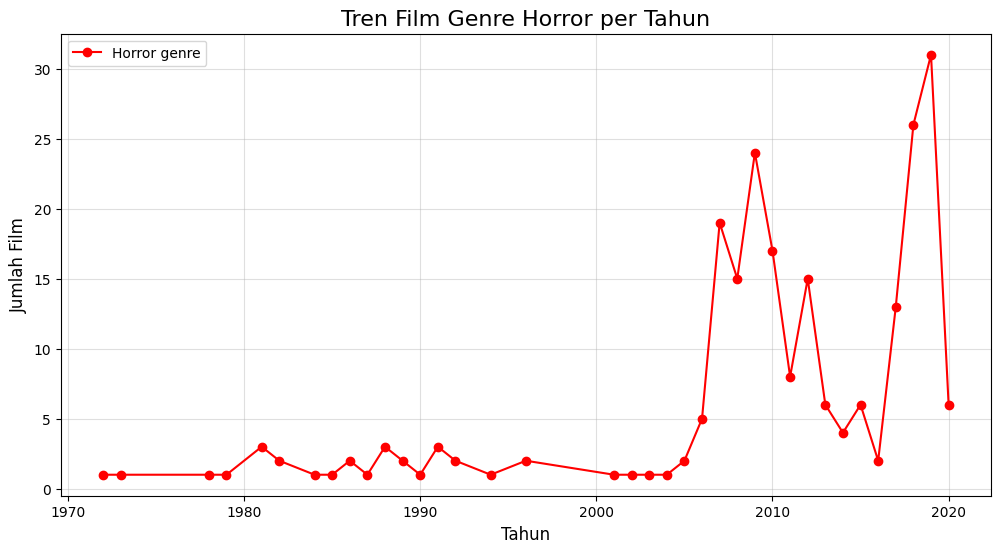

In [67]:
import matplotlib.pyplot as plt

# Filter data untuk genre Horror
horror_trend = genre_trend[genre_trend['genre'].str.contains('Horror', case=False)]

# Plot tren jumlah film genre Horror per tahun
plt.figure(figsize=(12, 6))
plt.plot(horror_trend['year'], horror_trend['count'], marker='o', linestyle='-', color='red', label='Horror genre')
plt.title('Tren Film Genre Horror per Tahun', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Jumlah Film', fontsize=12)
plt.grid(alpha=0.4)
plt.legend()
plt.show()


5. Peramalan
    jika suda maka tinggal kita masukan saja dataset tadi ke ARIMA
    disini akan mendapatkan peramalan data 10 tahun ke depan

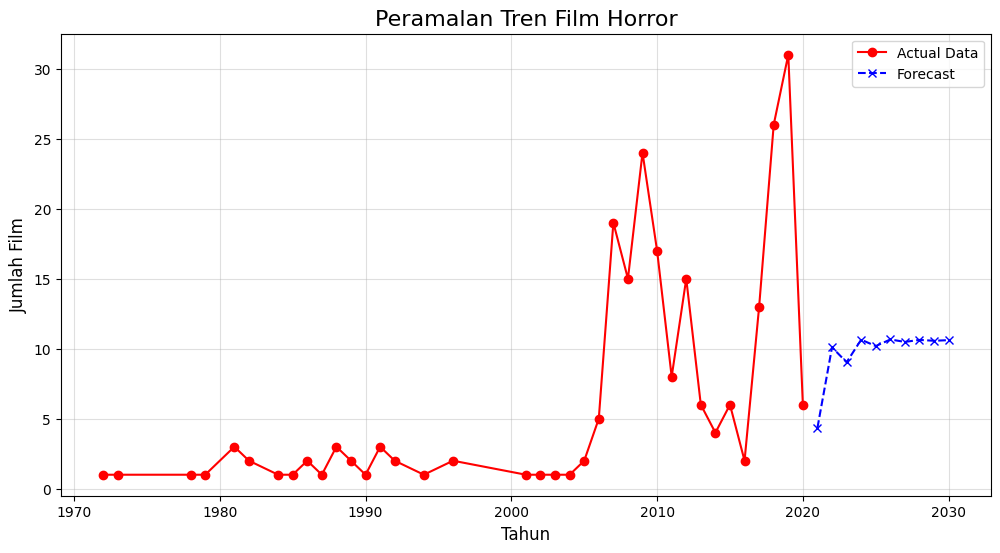

In [72]:
from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings('ignore')

horror_ts = horror_trend.set_index('year')['count']

model = ARIMA(horror_ts, order=(2, 1, 2)) 
model_fit = model.fit()


forecast = model_fit.forecast(steps=10)
forecast_years = list(range(horror_ts.index.max() + 1, horror_ts.index.max() + 11))


plt.figure(figsize=(12, 6))
plt.plot(horror_ts, label='Actual Data', color='red', marker='o')
plt.plot(forecast_years, forecast, label='Forecast', color='blue', linestyle='--', marker='x')
plt.title('Peramalan Tren Film Horror', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Jumlah Film', fontsize=12)
plt.legend()
plt.grid(alpha=0.4)
plt.show()

